# Selenium to Extract from Crypto Market Cap

## Import the libraris that will have in use:

this imports are not all the libraries that we will be using but are the required ones to use selenium for the extraction that we are looking for.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import numpy as np
import re as re
import time
import pandas as pd
import os
from pymongo import MongoClient
from dotenv import load_dotenv
from selenium.webdriver.chrome.options import Options

## Setting the enviroment to use selenium and import info

for the project ill be extracting the list of all crypto currencies from the we page listed in the URL

In [94]:
url = "https://coinmarketcap.com/?page=2"

In [95]:
# we need web page number of page to be added in the url by using the parameter for the url "/?page=3"

The following code will allow to set up the browser so that selenium can run and load a page:

In [96]:
options = Options()
options.add_argument('--window-size=2560,1440') # will asigne size of browser screen
options.add_argument('--disable-gpu') # use the GPU resources 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                          options = options) # this will launch the browser. 

[WDM] - Downloading: 100%|██████████| 6.21M/6.21M [00:00<00:00, 11.9MB/s]


In [97]:
driver.get(url)
time.sleep(4)

the following code slowly scrolls through a web page allowing for the content to load and ensure the extraction of all the available information by page:

In [98]:
current_scroll_position, new_height= 0, 1
while current_scroll_position <= new_height:
    current_scroll_position += 8
    driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
    new_height = driver.execute_script("return document.body.scrollHeight")
    
html = driver.execute_script("return document.body.outerHTML;")

In [102]:
#html

## ELT

Now that we have a HTML file we can use this information and starget specific information so that we can use it to make a data frame with all the cryptos in the market.

In [8]:
soup = BeautifulSoup(html,"html.parser")

###  Extracting the name of the crypto

In [16]:
feed = soup.find_all("p",{"class":"sc-1eb5slv-0 iworPT"})

In [17]:
len(feed)

106

In [18]:
feed[0].text

'PancakeSwap'

In [19]:
cryplist = []
for i in range (6,len(feed)):
        temp = feed[i].text
        cryplist.append(temp)

In [20]:
print(cryplist)

['Theta Fuel', 'Oasis Network', 'Ravencoin', 'Kadena', 'Gemini Dollar', 'IoTeX', 'Kyber Network Crystal v2', 'Amp', 'Livepeer', 'BORA', 'Balancer', 'OMG Network', 'Optimism', 'TerraClassicUSD', 'Celsius', '0x', 'Symbol', 'Harmony', 'Ethereum Name Service', 'ICON', 'JUST', 'Golem', 'Reserve Rights', 'IOST', 'Audius', 'Hive', 'Storj', 'Flux', 'Ontology', 'WAX', 'Serum', 'Siacoin', 'Horizen', 'Moonbeam', 'Secret', 'Immutable X', 'ABBC Coin', 'UMA', 'Braintrust', 'SXP', 'Chia', 'MXC', 'Bitcoin Standard Hashrate Token', 'SKALE Network', 'WOO Network', 'Polymath', 'Smooth Love Potion', 'SwissBorg', 'Casper', 'DigiByte', 'Dogelon Mars', 'DAO Maker', 'APENFT', 'PlayDapp', 'CEEK VR', 'Civic', 'SushiSwap', 'Spell Token', 'Voyager Token', 'Pundi X (New)', 'Keep Network', 'Lisk', 'Nervos Network', 'Render Token', 'MediBloc', 'Celer Network', 'Ellipsis', 'Energy Web Token', 'Ren', 'Nano', 'WINkLink', 'Injective', 'Conflux', 'NuCypher', 'Request', 'Ontology Gas', 'ConstitutionDAO', 'Orbs', 'dYdX', '

In [21]:
len(cryplist)

100

###  Extracting the Supply for every Crypto

In [22]:
supply= soup.find_all("p",{"class":"sc-1eb5slv-0 kZlTnE"})

In [23]:
len(supply)

100

In [24]:
supply[0].text

'5,301,214,400 TFUEL'

In [25]:
suplist=[]
for e in range (0,len(supply)):
    temp = supply[e].text
    suplist.append(temp)

In [27]:
print(suplist)

['5,301,214,400 TFUEL', '5,027,383,223 ROSE', '10,473,290,000 RVN', '197,986,762 KDA', '318,240,045 GUSD', '9,540,779,324 IOTX', '177,809,350 KNC', '42,227,702,186 AMP', '24,487,538 LPT', '927,500,000 BORA', '43,115,645 BAL', '140,245,398 OMG', '234,748,364 OP', '9,815,492,200 USTC', '238,863,520 CEL', '847,496,055 ZRX', '5,582,460,005 XYM', '12,439,633,430 ONE', '20,244,862 ENS', '919,483,096 ICX', '8,902,080,000 JST', '1,000,000,000 GLM', '42,302,323,974 RSR', '18,588,745,668 IOST', '818,441,374 AUDIO', '434,638,910 HIVE', '409,514,778 STORJ', '258,142,426 FLUX', '875,249,524 ONT', '2,132,391,668 WAXP', '263,244,669 SRM', '51,784,462,992 SC', '12,753,094 ZEN', '360,870,145 GLMR', '163,295,557 SCRT', '235,284,001 IMX', '1,009,277,022 ABBC', '68,715,405 UMA', '91,803,328 BTRST', '495,442,521 SXP', '4,908,256 XCH', '2,642,132,372 MXC', '12,201,404 BTCST', '3,676,102,671 SKL', '1,145,741,585 WOO', '924,998,413 POLY', '43,322,775,281 SLP', '1,000,000,000 CHSB', '5,738,068,663 CSPR', '15,5

In [26]:
len(suplist)

100

###  Extracting the TAG for every Crypto

In [28]:
coin =soup.find_all("p",{"class":"sc-1eb5slv-0 gGIpIK coin-item-symbol"})

In [29]:
len(coin)

106

In [30]:
coin[1].text

''

In [31]:
coinlist = []
for i in range (6,len(coin)):
        temp = coin[i].text
        coinlist.append(temp)

In [32]:
print(coinlist)

['TFUEL', 'ROSE', 'RVN', 'KDA', 'GUSD', 'IOTX', 'KNC', 'AMP', 'LPT', 'BORA', 'BAL', 'OMG', 'OP', 'USTC', 'CEL', 'ZRX', 'XYM', 'ONE', 'ENS', 'ICX', 'JST', 'GLM', 'RSR', 'IOST', 'AUDIO', 'HIVE', 'STORJ', 'FLUX', 'ONT', 'WAXP', 'SRM', 'SC', 'ZEN', 'GLMR', 'SCRT', 'IMX', 'ABBC', 'UMA', 'BTRST', 'SXP', 'XCH', 'MXC', 'BTCST', 'SKL', 'WOO', 'POLY', 'SLP', 'CHSB', 'CSPR', 'DGB', 'ELON', 'DAO', 'NFT', 'PLA', 'CEEK', 'CVC', 'SUSHI', 'SPELL', 'VGX', 'PUNDIX', 'KEEP', 'LSK', 'CKB', 'RNDR', 'MED', 'CELR', 'EPS', 'EWT', 'REN', 'XNO', 'WIN', 'INJ', 'CFX', 'NU', 'REQ', 'ONG', 'PEOPLE', 'ORBS', 'DYDX', 'FX', 'RLY', 'UOS', 'ARDR', 'TRIBE', 'NMR', 'POWR', 'MX', 'RLC', 'SNT', 'COTI', 'VLX', 'XYO', 'CHR', 'ACA', 'PROM', 'API3', 'FXS', 'TEL', 'DENT', 'OCEAN']


In [33]:
len(coinlist)

100

###  Extracting the Market Capital for every Crypto

In [34]:
mcap =soup.find_all("p",{"class":"sc-1eb5slv-0 hykWbK"})


In [35]:
len(mcap)

102

In [36]:
mcap[1].text

'$339.31M$339,313,697'

In [37]:
mcaplist = []
for i in range (1,len(mcap)-1):
        temp = mcap[i].text
        mcaplist.append(temp)

In [39]:
print(mcaplist)

['$339.31M$339,313,697', '$331.51M$331,513,453', '$325.95M$325,950,362', '$319.13M$319,134,201', '$313.02M$313,021,076', '$311.78M$311,782,064', '$307.56M$307,562,994', '$287.57M$287,566,834', '$278.38M$278,384,895', '$275.66M$275,657,893', '$264.43M$264,425,150', '$263.45M$263,448,603', '$261.74M$261,741,260', '$261.08M$261,075,885', '$259.98M$259,982,727', '$258.41M$258,410,387', '$257.24M$257,240,814', '$256.94M$256,937,766', '$256.82M$256,823,876', '$256.49M$256,492,797', '$253.19M$253,186,451', '$249.92M$249,920,345', '$247.25M$247,250,572', '$245.59M$245,591,519', '$244.80M$244,798,599', '$240.13M$240,131,747', '$236.95M$236,945,697', '$232.79M$232,793,683', '$218.46M$218,464,529', '$216.16M$216,158,753', '$213.47M$213,468,671', '$209.78M$209,780,378', '$207.59M$207,586,047', '$204.20M$204,202,326', '$199.01M$199,008,541', '$195.41M$195,406,815', '$194.33M$194,325,588', '$194.21M$194,208,643', '$191.76M$191,764,630', '$191.37M$191,369,860', '$187.14M$187,137,701', '$187.10M$187,1

In [38]:
len(mcaplist)

100

### Extratcting this information for every page in the URL 

The Crypto currency market cap link only displays 100 coins per page and it has 96 pages in total so need to iterate te link: 

"https://coinmarketcap.com/?page={i}"

We set up the everything in a loop so that we can do an iteration for every web link that contains the information we want to extrat in order to have a general database of all available coins.

i am only considering the first 30 pages of crypto currency market cap because after the 2600 coin the valuation of this coins 

In [112]:
# temporary storage list
cryplist = []
suplist = []
coinlist = []
mcaplist = []

# Loop for Selenium extraction:

for i in range (1,31):
    url = f"https://coinmarketcap.com/?page={i}"
    
    # Sellenium set up
    options = Options()
    options.add_argument('--headless') #prevents chrome from oppening
    options.add_argument('--window-size=2560,1440') #set the browsers window size
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                              options = options)
    driver.get(url)
    
    # time dalay for the webpage to load:
    time.sleep(3)
    current_scroll_position, new_height= 0, 1
    while current_scroll_position <= new_height:
        current_scroll_position += 8
        driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
        new_height = driver.execute_script("return document.body.scrollHeight")

    html = driver.execute_script("return document.body.outerHTML;")
    soup = BeautifulSoup(html,"html.parser")
    
    # Crypto currency name:
    crypt = soup.find_all("p",{"class":"sc-1eb5slv-0 iworPT"})
    
    for e in range (6,len(crypt)):
            temp = crypt[e].text
            cryplist.append(temp)
    
     # Crypto Circulating supply:
    supply= soup.find_all("p",{"class":"sc-1eb5slv-0 kZlTnE"})
    
    for d in range (0,len(supply)):
            temp = supply[d].text
            suplist.append(temp)
            
    # Crypto coin Tag:        
    coin =soup.find_all("p",{"class":"sc-1eb5slv-0 gGIpIK coin-item-symbol"})
        
    for f in range (6,len(coin)):
            temp = coin[f].text
            coinlist.append(temp)
            
    # Market Cap:        
    mcap =soup.find_all("p",{"class":"sc-1eb5slv-0 hykWbK"})
    
    for g in range (1,len(mcap)-1):
            temp = mcap[g].text
            mcaplist.append(temp)
            
    print("The extraction is at:",(str(round(((i/30)*100),2))+" "+"%"),end = '\r')

This snip-it of code will allow me to know the progress of the extraction using the selenium library:

In [6]:
for i in range(1,96):
    print("The extraction is at:",(str(round(((i/95)*100),2))+" "+"%"),end = '\r')

Now we check the diferent lists and check how much information is being extracted, and validate that the list are the same size so that we can zip them together:

In [113]:
len(cryplist)

3000

In [115]:
len(coinlist)

3000

### Cleaning and preparing extracted info

Now we need to clean the information that is in our mcap and suplist, we need to strip and replace some characters and convert the information into an integer to make calculations. 

In [151]:
mcaplist2 =[]
for i in range(0,len(mcaplist)):
    temp = int(mcaplist[i].split("$")[2].replace(",",""))
    mcaplist2.append(temp)

In [155]:
mcaplist2[0:5]

[386397924400, 183395206574, 67554553738, 52220337195, 45732354376]

In [167]:
suplist2 =[]
for i in range(0,len(suplist)):
    temp = int(suplist[i].split(" ")[0].replace(",",""))
    suplist2.append(temp)

In [168]:
suplist2[0:5]

[19133556, 122131426, 67549664915, 52212562312, 161337261]

### Creating a Dictionary and DF from our list. 

The information is now clean as we want it and we can use it to analize what the currency valuation is at the moement and later we can use it to analize the distribution of prices of the top 2500 currencies. first we will create a dataframe by using the list zip method and afterwards creating a dataframe using pandas.

In [169]:
all_crypto = list(zip(cryplist, coinlist,suplist2,mcaplist2))

In [170]:
df_crypto = pd.DataFrame(all_crypto, columns = ['name', 'coin','supply','mcap'])

Create a new column that will give us the coin price considering the market capital diluted in the current circulating supply.

In [176]:
df_crypto["price"] =round(df_crypto["mcap"]/df_crypto["supply"],5) 

In [203]:
df_crypto.sample(10)

name  coin      supply        mcap        price
1595           Golos Blockchain   GLS   307291234      636666      0.00207
16              Wrapped Bitcoin  WBTC      247761  5002514687  20190.88834
873        Phoenix Global (new)   PHB    37136775     6517386      0.17550
1659                    Minswap   MIN    25000000      522227      0.02089
564                   ZIMBOCASH  ZASH  1590616010    23816732      0.01497
1435                 DragonVein   DVC   605026614     1016513      0.00168
1820             Planet Inverse   XIV    33435498      322020      0.00963
2180  Fortuna Sittard Fan Token   FOR      145000      101725      0.70155
548                      Cortex  CTXC   199936563    24820749      0.12414
2270                   PiplCoin  PIPL   172536809       69663      0.00040

Now we save our usefull database to do market analysis later in conjuction with the time series.

In [185]:
df_crypto.to_csv(".\\output\\df_crypto.csv")

# Extracting Info from Yahoo Finance

This library will help us get the time series of any crypto currency listed in Yahoo Finance:

In [100]:
# Import the necessary functions
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [101]:
from dateutil.relativedelta import relativedelta

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing

# Scikit learn
from sklearn.linear_model import LinearRegression

In [102]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## Extracting the Timeserie of a Coin

as shown bellow we will be extractin the information for the proce fluctuation of a crypto currency using the Yahoo Finanace estraction library Pandas_datareader this will give us important metrics such as 

- Adjusted Closing market price
- Colising price per day
- Highest value reached per day
- Lowest value reached per day
- Opening price per day
- Volumen of transaction movements during the day


In [381]:
# the list of variables should be dynamic - the user should have a choice of how many cryptos to run it on
COINS=['BTC-USD']

data = pdr.yahoo.daily.YahooDailyReader(symbols=COINS, start=datetime(2017, 11, 9), end=datetime(2022, 8, 27), get_actions=True)
df = data.read()
#df=df.iloc[:, df.columns.get_level_values(0)=='Adj Close']

the currency must be: "Name_of_Coin" + "-USD" this will search for the desired coin with the fiat USD valuation.

Example:

COINS=['GRID-USD']


In [387]:
df

Attributes     Adj Close         Close          High           Low  \
Date                                                                 
2017-11-09   7143.580078   7143.580078   7446.830078   7101.520020   
2017-11-10   6618.140137   6618.140137   7312.000000   6436.870117   
2017-11-11   6357.600098   6357.600098   6873.149902   6204.220215   
2017-11-12   5950.069824   5950.069824   6625.049805   5519.009766   
2017-11-13   6559.490234   6559.490234   6811.189941   5844.290039   
...                  ...           ...           ...           ...   
2022-08-24  21395.019531  21395.019531  21783.076172  21195.005859   
2022-08-25  21600.904297  21600.904297  21789.636719  21362.441406   
2022-08-26  20260.019531  20260.019531  21804.908203  20199.482422   
2022-08-27  20041.738281  20041.738281  20340.775391  19890.523438   
2022-08-28  19616.814453  19616.814453  20139.054688  19616.814453   

Attributes          Open       Volume  Series  
Date                                           
2017-11-09   7446.830078   3226249984       1  
2017-11-10   7173.729980   5208249856       2  
2017-11-11   6618.609863   4908680192       3  
2017-11-12   6295.450195   8957349888       4  
2017-11-13   5938.250000   6263249920       5  
...                  ...          ...     ...  
2022-08-24  21526.455078  31962253368    1750  
2022-08-25  21395.458984  31028679593    1751  
2022-08-26  21596.085938  42326789564    1752  
2022-08-27  20262.480469  30116729776    1753  
2022-08-28  20041.035156  24366810591    1754  

[1754 rows x 7 columns]

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1754 entries, 2017-11-09 to 2022-08-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1754 non-null   float64
 1   Close      1754 non-null   float64
 2   High       1754 non-null   float64
 3   Low        1754 non-null   float64
 4   Open       1754 non-null   float64
 5   Volume     1754 non-null   int64  
 6   Series     1754 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 102.8 KB


### Ploting the Crypto Time Series by YEAR

#### Year 2022

In [ ]:
df = df.droplevel(level=1,axis=1)

In [390]:
df = df.reset_index()

In [391]:
df2022 = df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-08-31')]

In [392]:
df2022 = df2022.set_index("Date")

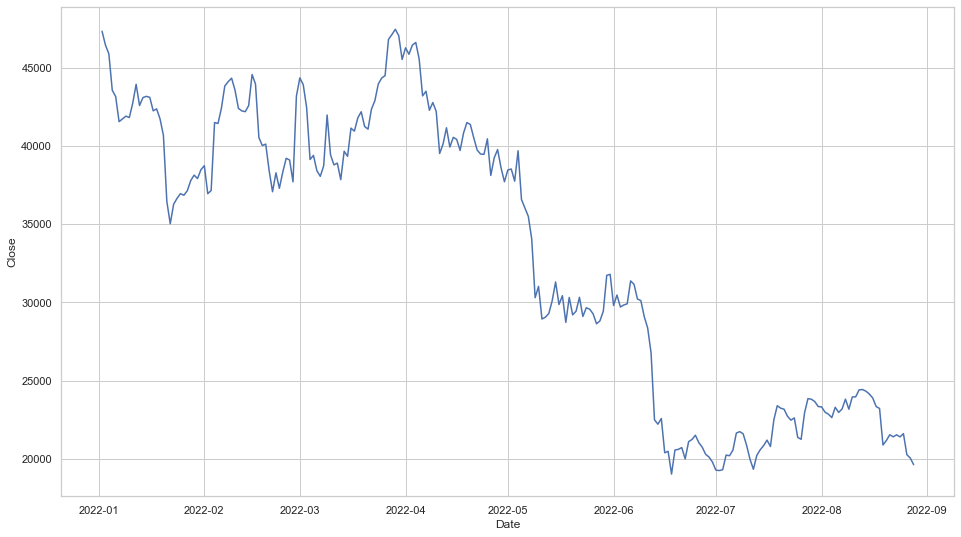

In [393]:
scatter= sns.lineplot(data=df2022.Close)

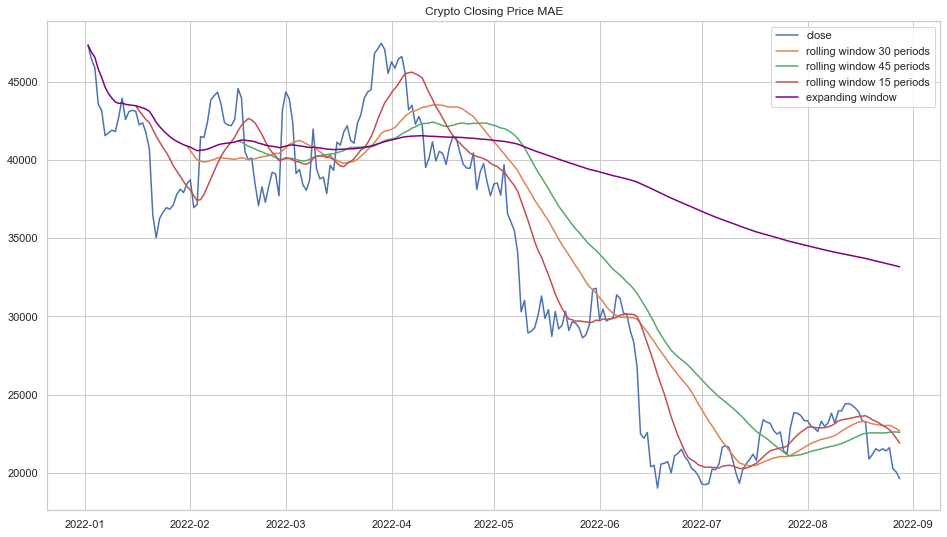

In [394]:
plt.plot(df2022["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2022.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2022.Close.rolling(window=45).mean(), label="rolling window 45 periods")
plt.plot(df2022.Close.rolling(window=15).mean(), label="rolling window 15 periods")
plt.plot(df2022.Close.expanding().mean(), c="purple", label="expanding window")
plt.legend();

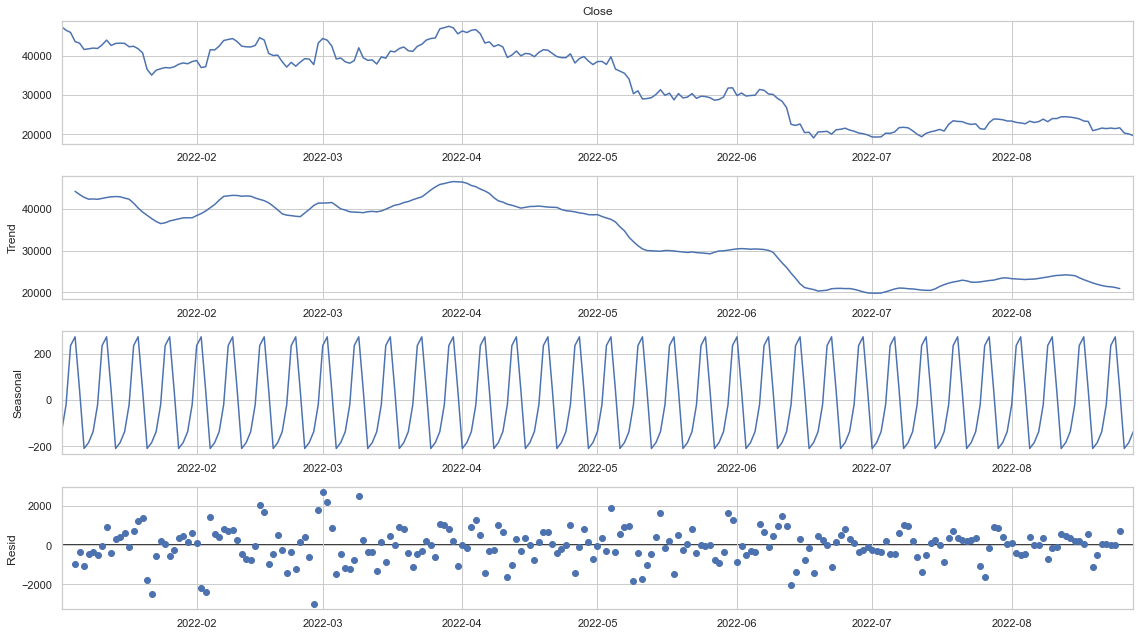

In [395]:
res = seasonal_decompose(df2022.Close, model="additive")
res.plot();

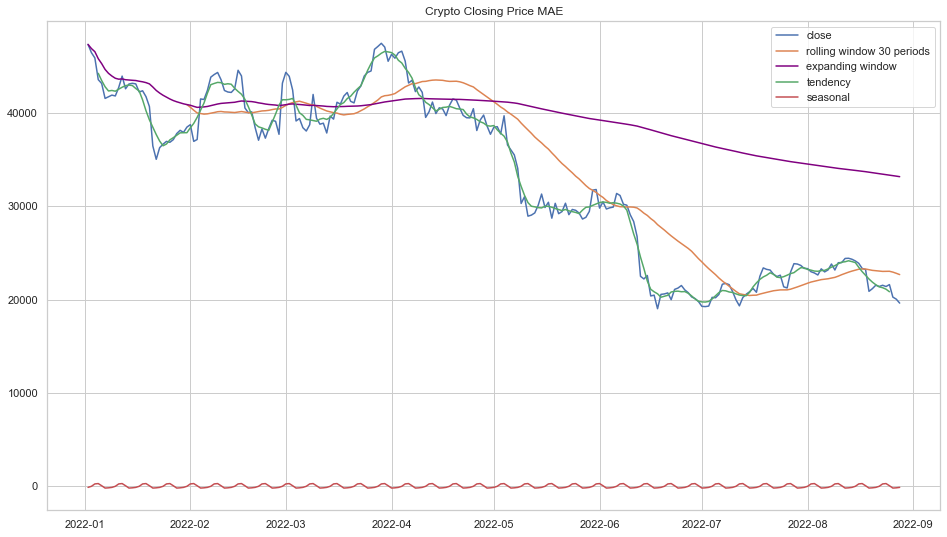

In [396]:
plt.plot(df2022["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2022.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2022.Close.expanding().mean(), c="purple", label="expanding window")
plt.plot(res.trend, label="tendency")
plt.plot(res.seasonal, label="seasonal")
plt.legend();

#### Year 2021

In [397]:
df2021 = df[(df['Date'] > '2021-01-01') & (df['Date'] < '2021-12-31')]

In [398]:
df2021 = df2021.set_index("Date")

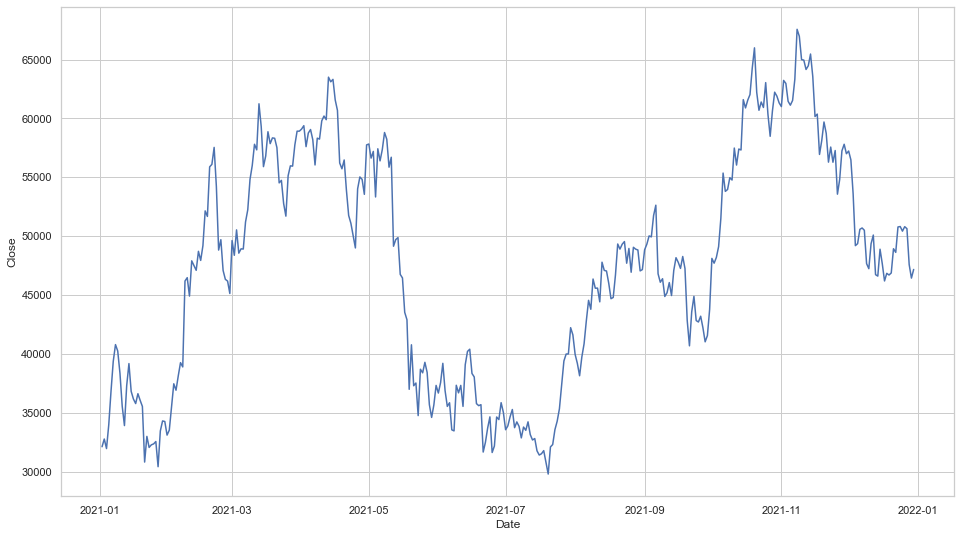

In [399]:
scatter= sns.lineplot(data=df2021.Close)

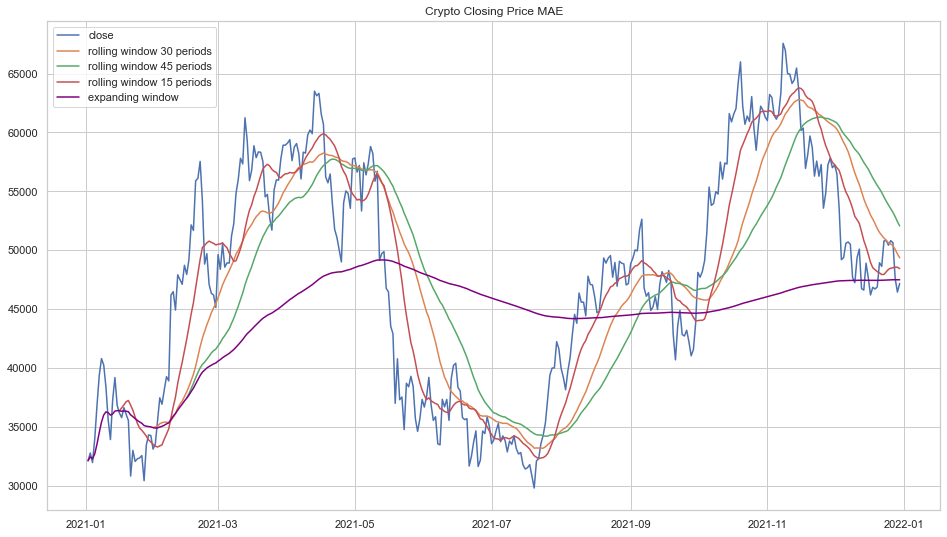

In [400]:
plt.plot(df2021["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2021.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2021.Close.rolling(window=45).mean(), label="rolling window 45 periods")
plt.plot(df2021.Close.rolling(window=15).mean(), label="rolling window 15 periods")
plt.plot(df2021.Close.expanding().mean(), c="purple", label="expanding window")
plt.legend();

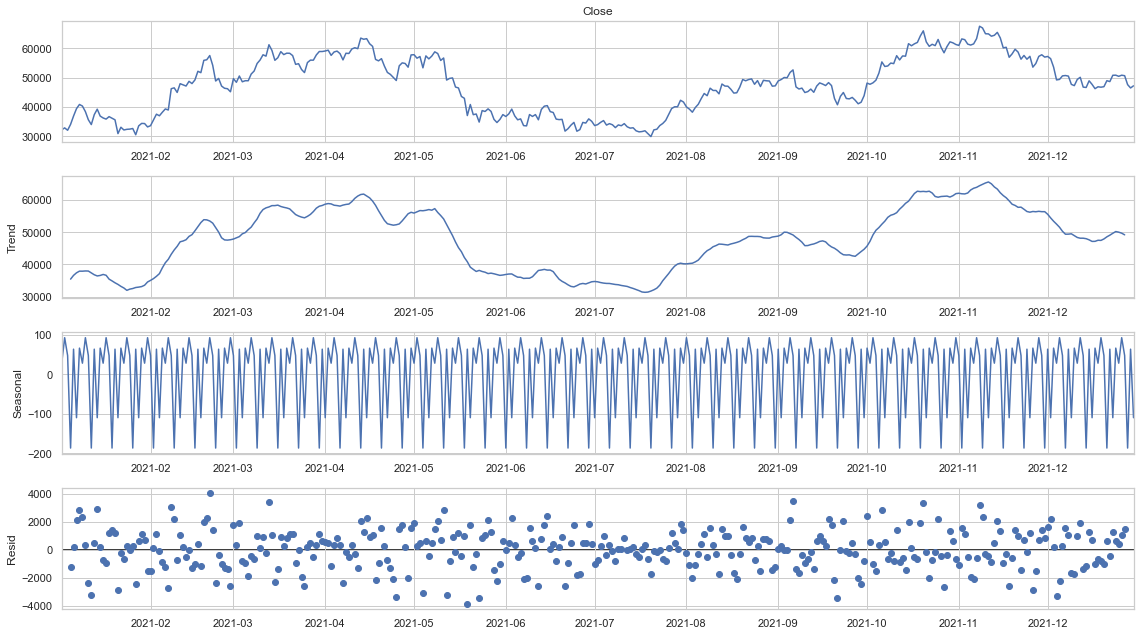

In [401]:
res = seasonal_decompose(df2021.Close, model="additive")
res.plot();

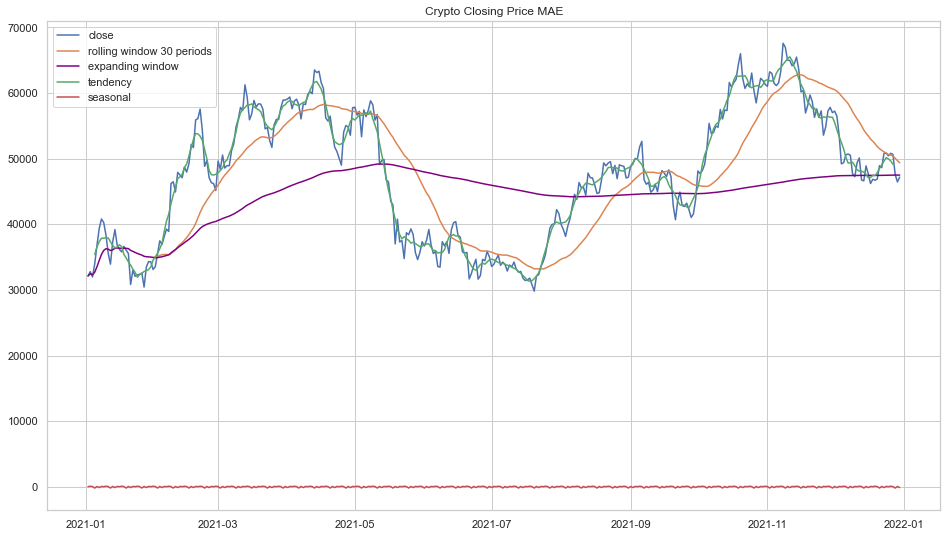

In [402]:
plt.plot(df2021["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2021.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2021.Close.expanding().mean(), c="purple", label="expanding window")
plt.plot(res.trend, label="tendency")
plt.plot(res.seasonal, label="seasonal")
plt.legend();

#### Year 2020

In [403]:
df2020 = df[(df['Date'] > '2020-01-01') & (df['Date'] < '2020-08-31')]

In [404]:
df2020 = df2020.set_index("Date")

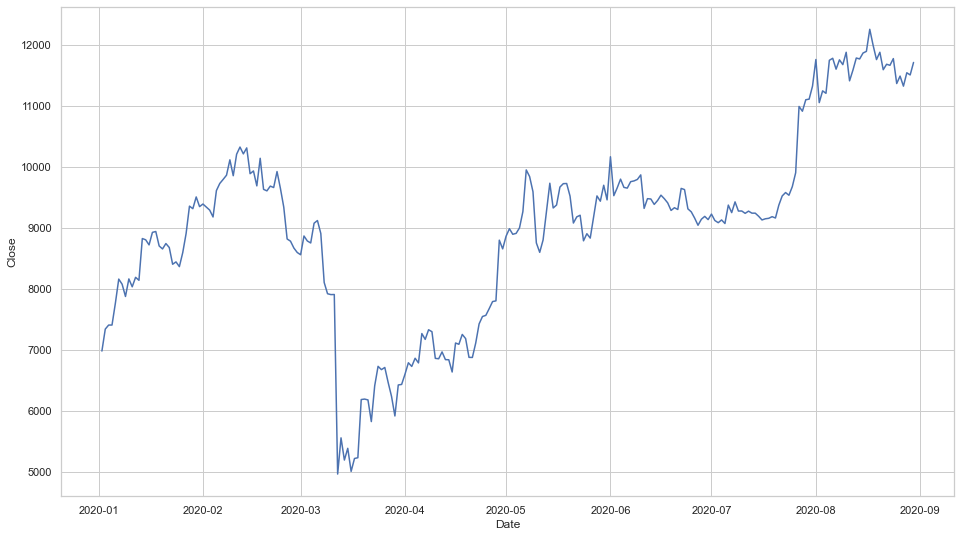

In [405]:
scatter= sns.lineplot(data=df2020.Close)

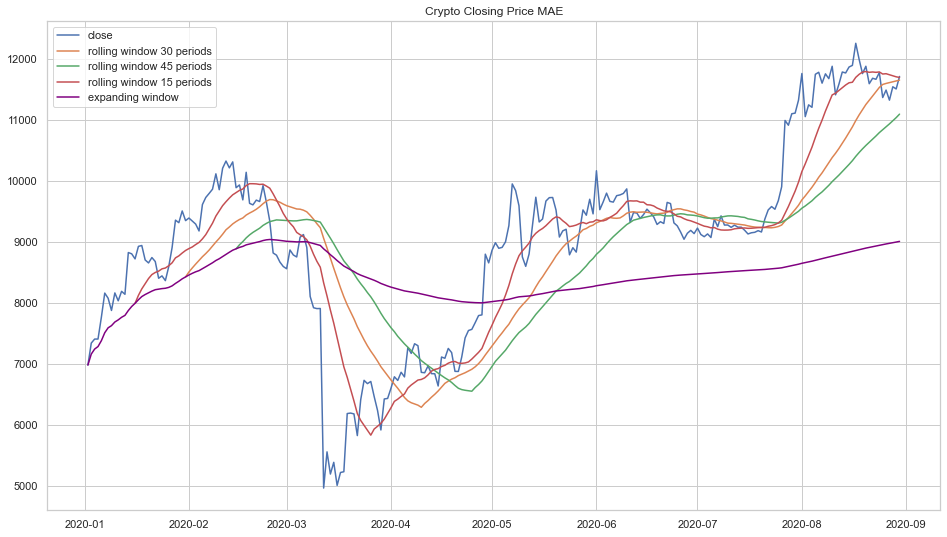

In [406]:
plt.plot(df2020["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2020.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2020.Close.rolling(window=45).mean(), label="rolling window 45 periods")
plt.plot(df2020.Close.rolling(window=15).mean(), label="rolling window 15 periods")
plt.plot(df2020.Close.expanding().mean(), c="purple", label="expanding window")
plt.legend();

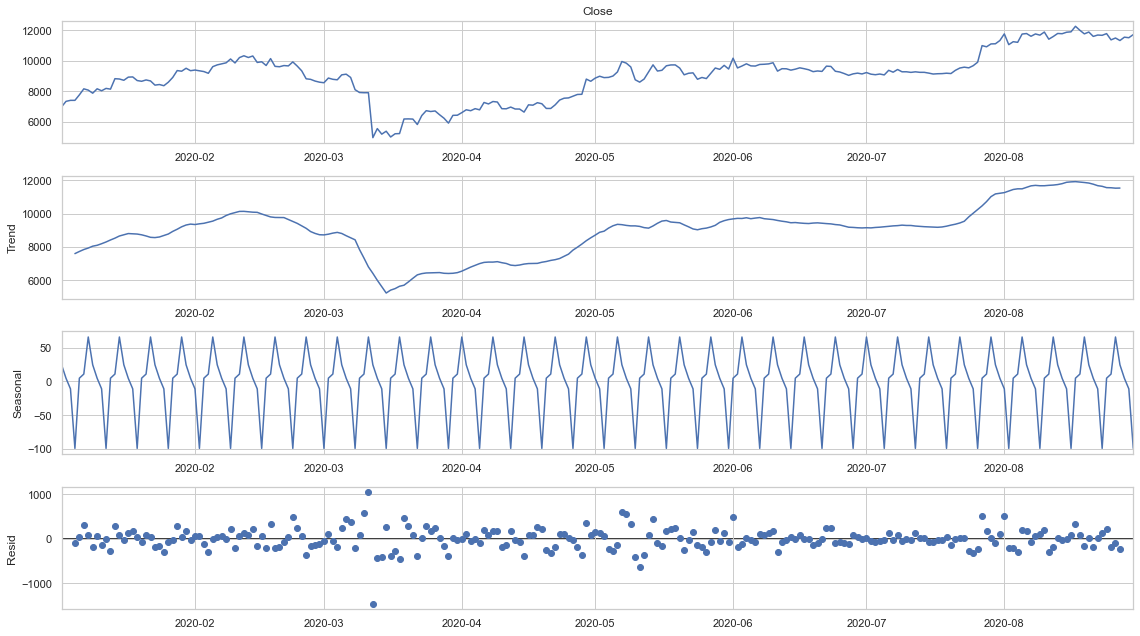

In [407]:
res = seasonal_decompose(df2020.Close, model="additive")
res.plot();

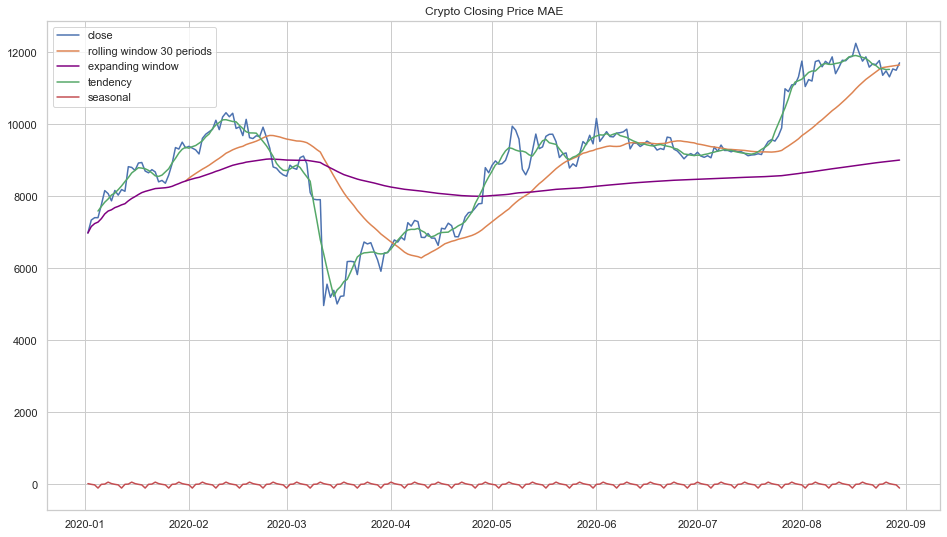

In [408]:
plt.plot(df2020["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2020.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2020.Close.expanding().mean(), c="purple", label="expanding window")
plt.plot(res.trend, label="tendency")
plt.plot(res.seasonal, label="seasonal")
plt.legend();

#### Year 2019

In [409]:
df2019 = df[(df['Date'] > '2019-01-01') & (df['Date'] < '2019-08-31')]

In [410]:
df2019 = df2019.set_index("Date")

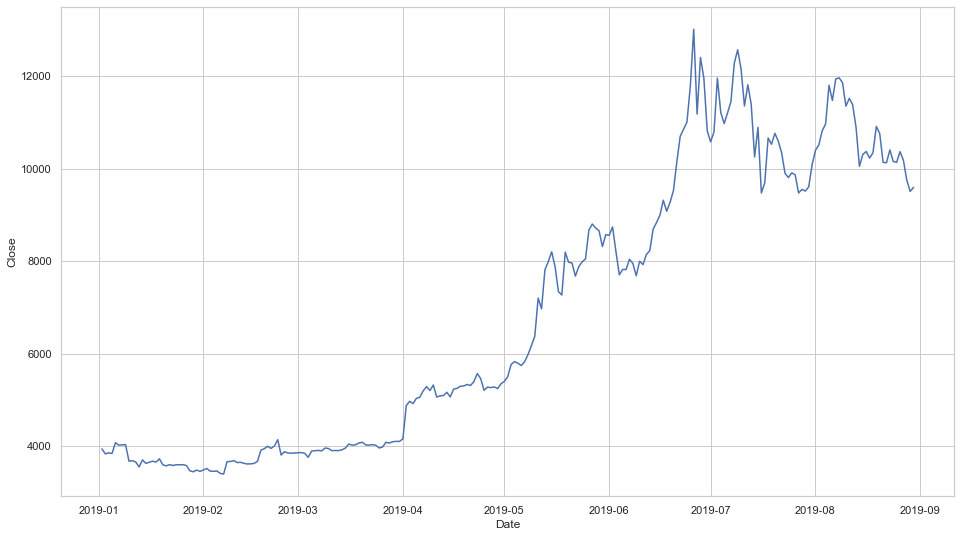

In [411]:
scatter= sns.lineplot(data=df2019.Close)

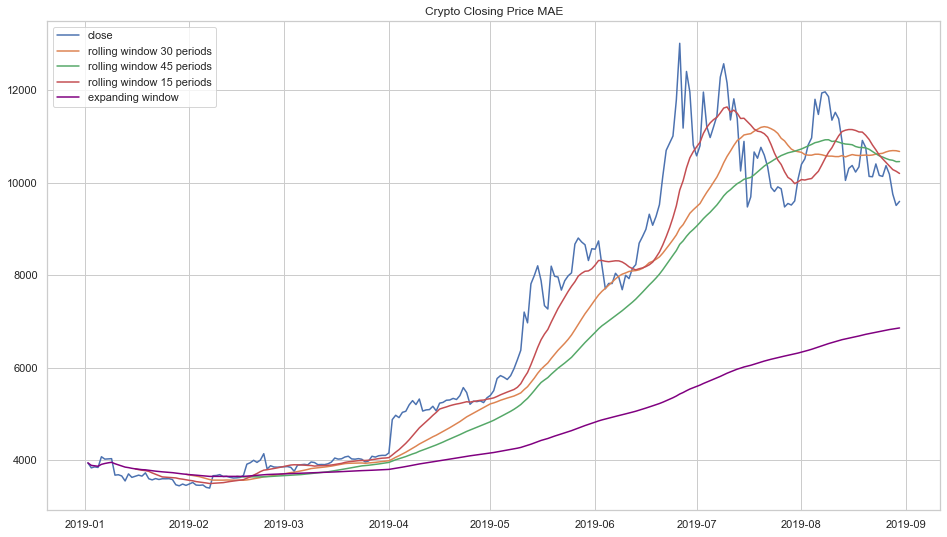

In [412]:
plt.plot(df2019["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2019.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2019.Close.rolling(window=45).mean(), label="rolling window 45 periods")
plt.plot(df2019.Close.rolling(window=15).mean(), label="rolling window 15 periods")
plt.plot(df2019.Close.expanding().mean(), c="purple", label="expanding window")
plt.legend();

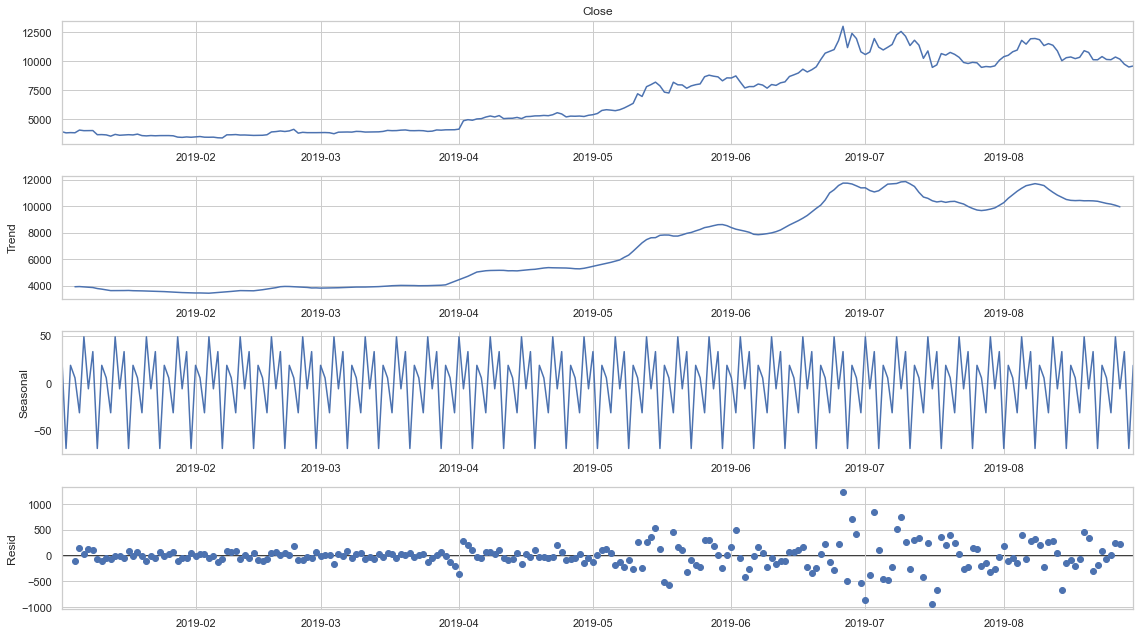

In [413]:
res = seasonal_decompose(df2019.Close, model="additive")
res.plot();

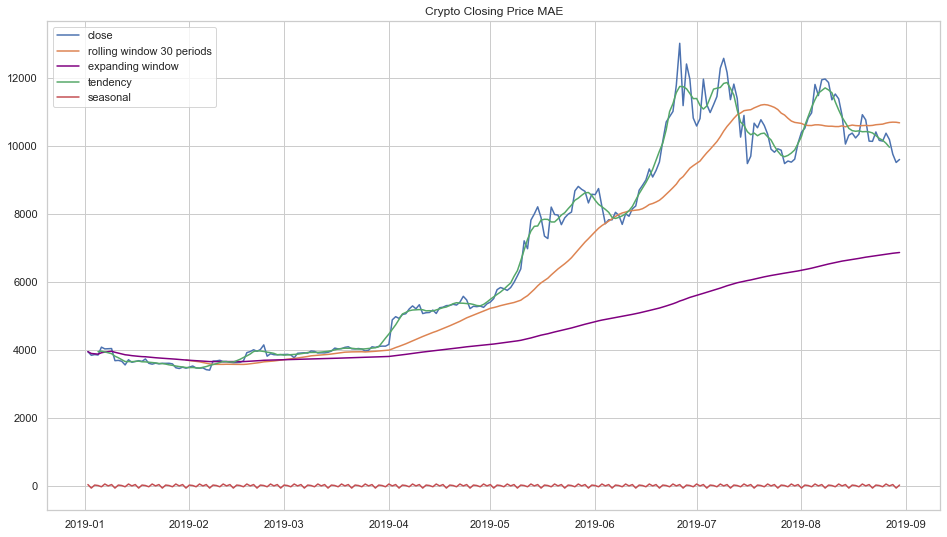

In [414]:
plt.plot(df2019["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df2019.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df2019.Close.expanding().mean(), c="purple", label="expanding window")
plt.plot(res.trend, label="tendency")
plt.plot(res.seasonal, label="seasonal")
plt.legend();

## Ploting the Crypto Time Series

this graph can be adjusted so that it can use an adjustable bar to set the date range

also we can set an adjustable y-axis scale to wee graphs with mode detail.

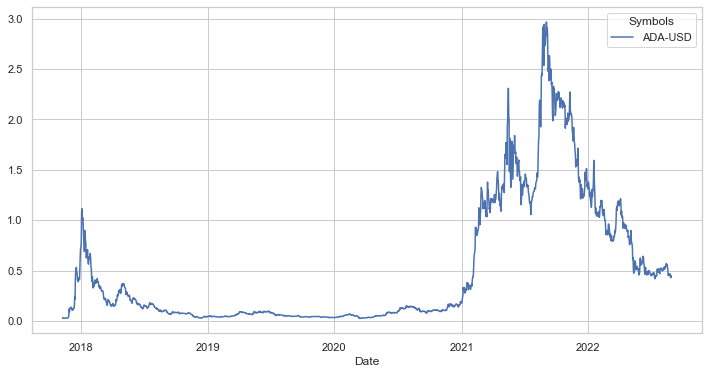

In [106]:
scatter= sns.lineplot(data=df.Close)
#scatter.set_xlim(pd.Timestamp('2021-02-15'), pd.Timestamp('2022-07-01'));
#scatter.set_ylim(bottom=0, top=3);

In [107]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [108]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

## Ploting a Crypto by closing pice with MAE and Avg. Expanding

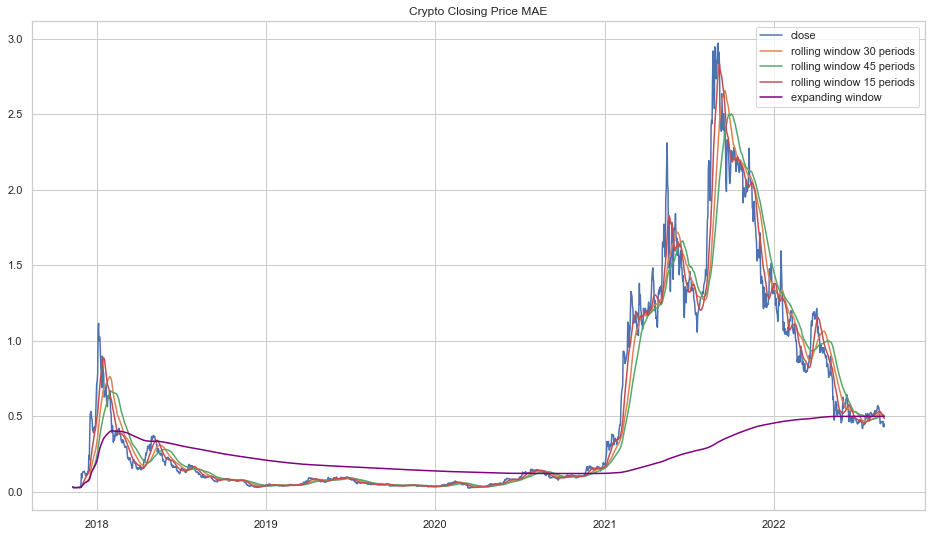

In [109]:
plt.plot(df["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df.Close.rolling(window=45).mean(), label="rolling window 45 periods")
plt.plot(df.Close.rolling(window=15).mean(), label="rolling window 15 periods")
plt.plot(df.Close.expanding().mean(), c="purple", label="expanding window")
plt.legend();

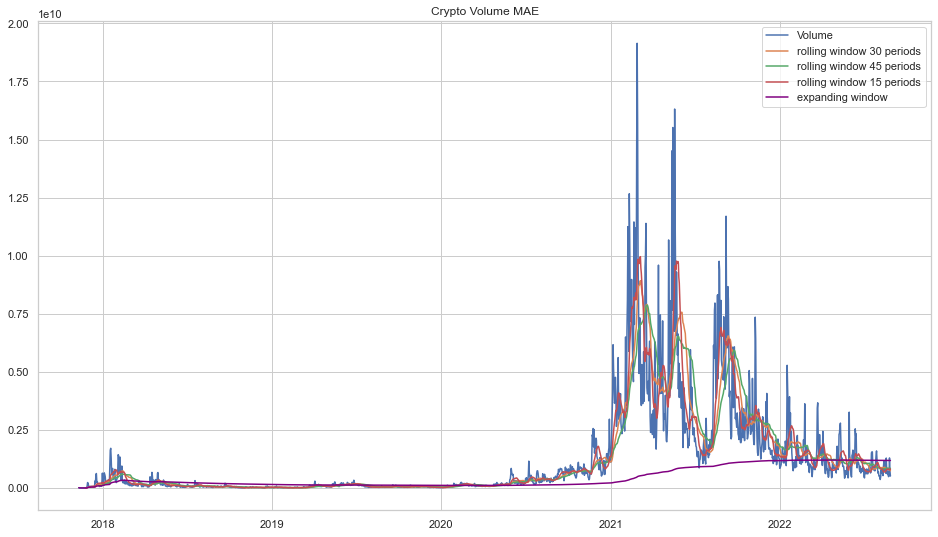

In [110]:
plt.plot(df["Volume"], label="Volume")
plt.title("Crypto Volume MAE")
plt.plot(df.Volume.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df.Volume.rolling(window=45).mean(), label="rolling window 45 periods")
plt.plot(df.Volume.rolling(window=15).mean(), label="rolling window 15 periods")
plt.plot(df.Volume.expanding().mean(), c="purple", label="expanding window")
plt.legend();

## Crypto Sesonality, Trend and Residuals

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

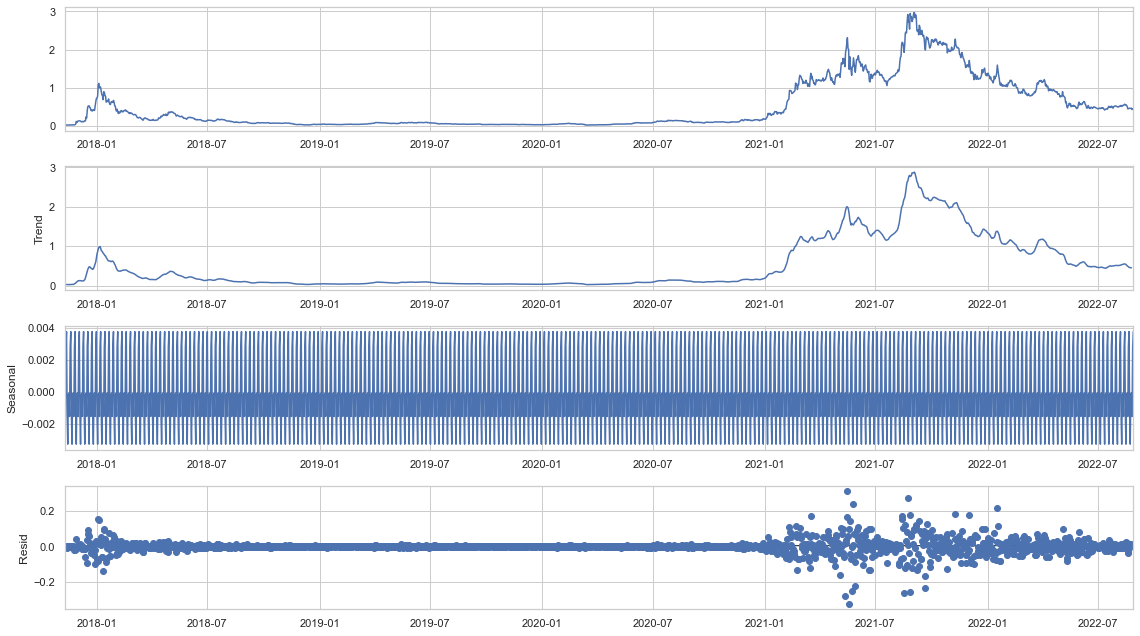

In [112]:
res = seasonal_decompose(df.Close, model="additive")
res.plot();

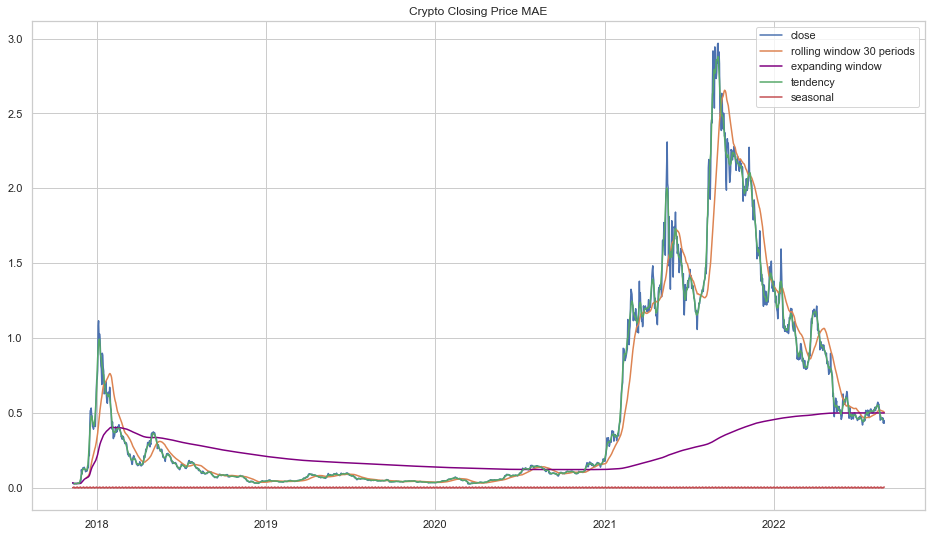

In [113]:
plt.plot(df["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(df.Close.rolling(window=30).mean(), label="rolling window 30 periods")
plt.plot(df.Close.expanding().mean(), c="purple", label="expanding window")
plt.plot(res.trend, label="tendency")
plt.plot(res.seasonal, label="seasonal")
plt.legend();

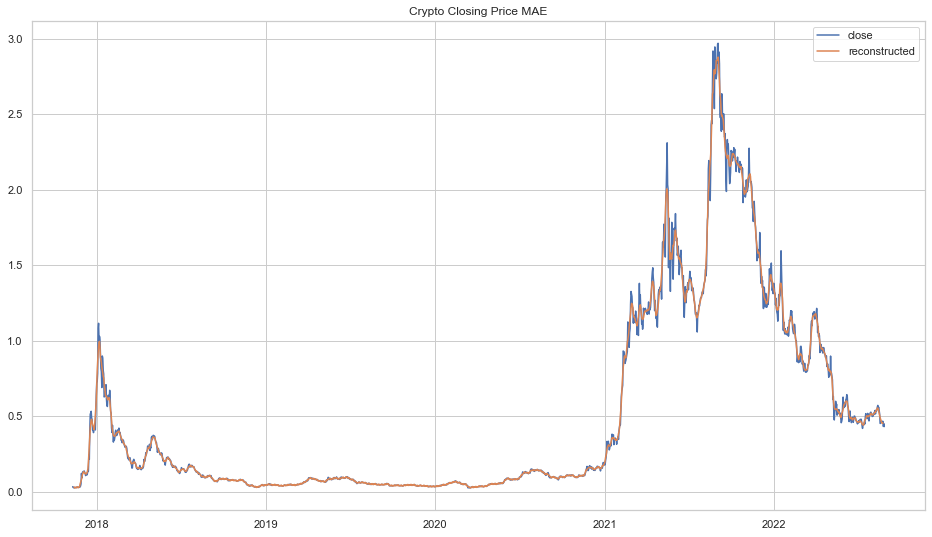

In [114]:
plt.plot(df["Close"], label="close")
plt.title("Crypto Closing Price MAE")
plt.plot(res.seasonal + res.trend, label="reconstructed")
plt.legend();

In [115]:
from statsmodels.tsa.stattools import adfuller

In [116]:
res = adfuller(df["Close"])
res

(-1.8644388605621953,
 0.348970579299269,
 22,
 1731,
 {'1%': -3.434133375964546,
  '5%': -2.8632111492477503,
  '10%': -2.5676596723058402},
 -5470.157020297203)

In [117]:
pvalue = res[1]
pvalue

0.348970579299269

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

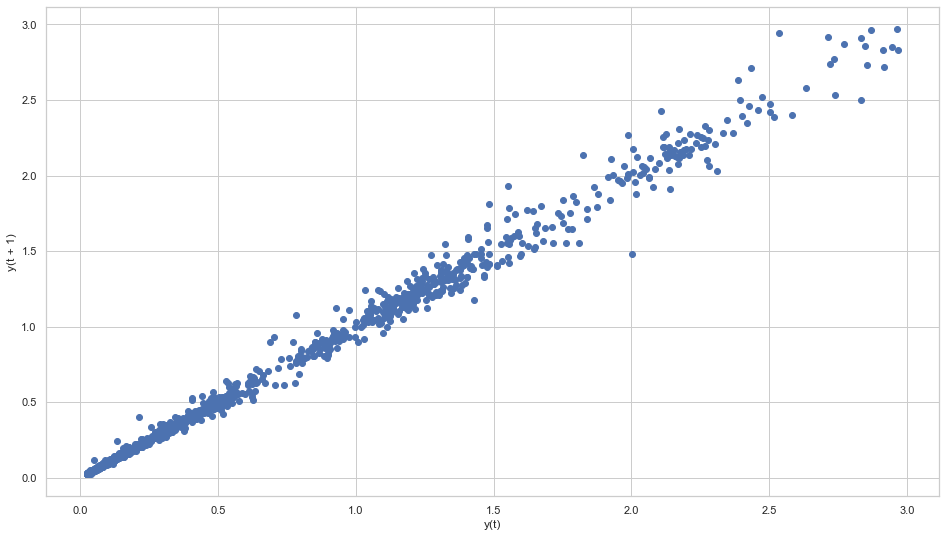

In [118]:
pd.plotting.lag_plot(df["Close"])

In [119]:
df["Close"].describe()

Symbols      ADA-USD
count    1754.000000
mean        0.498497
std         0.645092
min         0.023961
25%         0.059468
50%         0.138784
75%         0.842316
max         2.968239

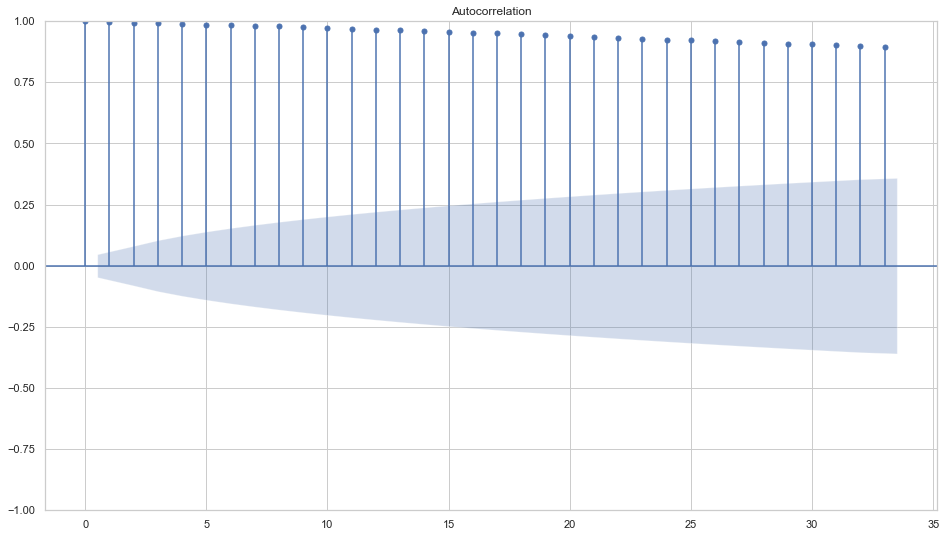

In [120]:
plot_acf(df["Close"]);

## Crypto ARIMA

In [268]:
from statsmodels.tsa.arima.model import ARIMA

In [269]:
df = df.droplevel(level=1,axis=1)

In [270]:
df['Series'] = np.arange(1,len(df)+1)

In [273]:
df = df.reset_index()

In [274]:
df

Attributes       Date  Adj Close     Close      High       Low      Open  \
0          2017-11-09   0.032053  0.032053  0.035060  0.025006  0.025160   
1          2017-11-10   0.027119  0.027119  0.033348  0.026451  0.032219   
2          2017-11-11   0.027437  0.027437  0.029659  0.025684  0.026891   
3          2017-11-12   0.023977  0.023977  0.027952  0.022591  0.027480   
4          2017-11-13   0.025808  0.025808  0.026300  0.023495  0.024364   
...               ...        ...       ...       ...       ...       ...   
1749       2022-08-24   0.458109  0.458109  0.466601  0.454518  0.465182   
1750       2022-08-25   0.464999  0.464999  0.473415  0.458041  0.458108   
1751       2022-08-26   0.430863  0.430863  0.481639  0.428157  0.464959   
1752       2022-08-27   0.449703  0.449703  0.450795  0.428077  0.431039   
1753       2022-08-28   0.430049  0.430049  0.453401  0.430049  0.449719   

Attributes      Volume  Series  
0             18716200       1  
1              6766780       2  
2              5532220       3  
3              7280250       4  
4              4419440       5  
...                ...     ...  
1749         494717036    1750  
1750         525337287    1751  
1751        1299179883    1752  
1752         733099946    1753  
1753         519341943    1754  

[1754 rows x 8 columns]

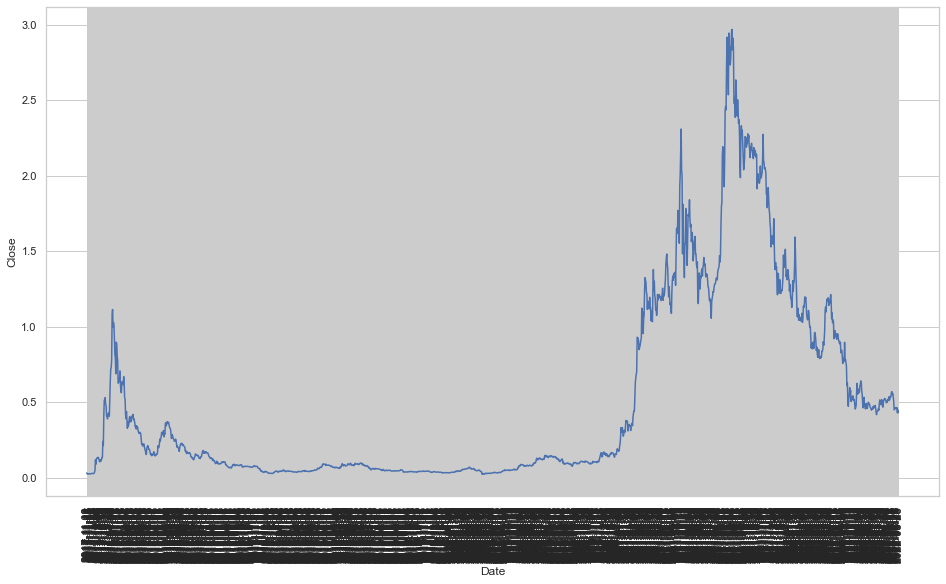

In [180]:
ax = sns.lineplot(x='Date', y='Close', data=df)
plt.xticks(df['Date'])
ax.tick_params(axis='x',rotation=90);

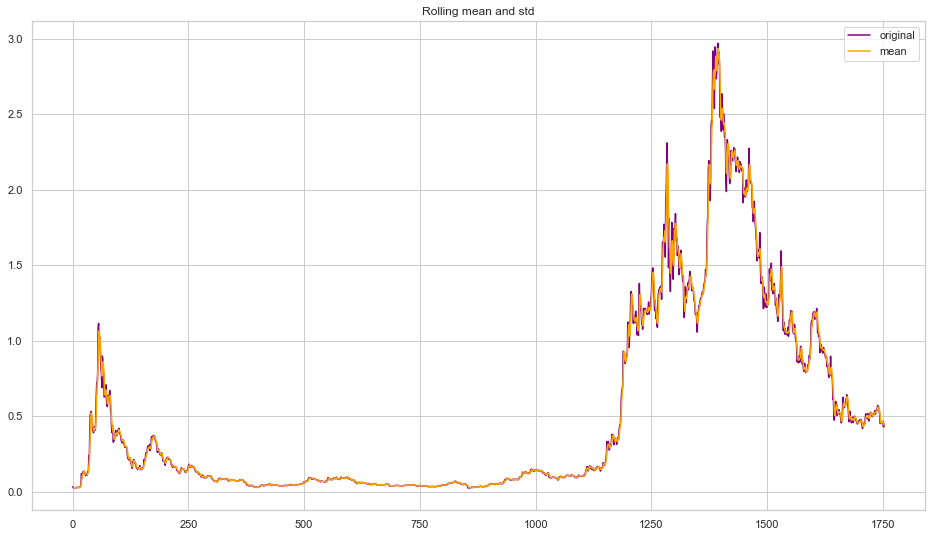

In [181]:
# Rolling window
rolling_mean = df['Close'].rolling(window=3).mean()
rolling_std = df['Close'].rolling(window=3).std()

# we plot the origina vs the MA of the mean
original = plt.plot(df['Close'], color='purple', label='original')
mean = plt.plot(rolling_mean, color='orange', label='mean')

# we ad legend and title, after we diplay
plt.legend(loc='best')
plt.title('Rolling mean and std')
plt.show();

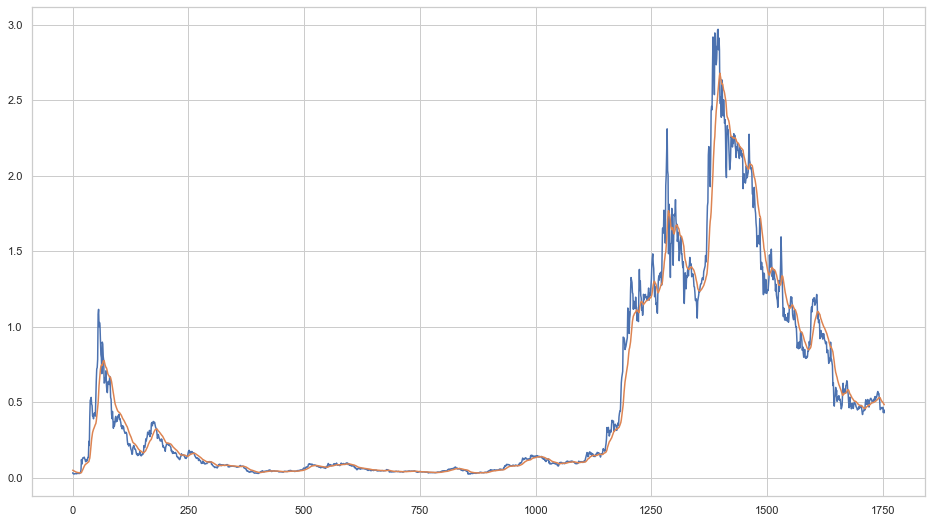

In [182]:
# we smothen the temperature line and fit it
es = SimpleExpSmoothing(df.Close.values)
es.fit(smoothing_level=0.1)

# now we graph and display the temperature line vs the es.predict
plt.plot(df.Close.values)
plt.plot(es.predict(es.params,start=0,end=None))
plt.show();

In [192]:
selected = df['Close']

In [191]:
df

Attributes  Adj Close     Close      High       Low      Open      Volume
Date                                                                     
2017-11-09   0.032053  0.032053  0.035060  0.025006  0.025160    18716200
2017-11-10   0.027119  0.027119  0.033348  0.026451  0.032219     6766780
2017-11-11   0.027437  0.027437  0.029659  0.025684  0.026891     5532220
2017-11-12   0.023977  0.023977  0.027952  0.022591  0.027480     7280250
2017-11-13   0.025808  0.025808  0.026300  0.023495  0.024364     4419440
...               ...       ...       ...       ...       ...         ...
2022-08-24   0.458109  0.458109  0.466601  0.454518  0.465182   494717036
2022-08-25   0.464999  0.464999  0.473415  0.458041  0.458108   525337287
2022-08-26   0.430863  0.430863  0.481639  0.428157  0.464959  1299179883
2022-08-27   0.449703  0.449703  0.450795  0.428077  0.431039   733099946
2022-08-28   0.430049  0.430049  0.453401  0.430049  0.449719   519341943

[1754 rows x 6 columns]

In [193]:
model = ARIMA(selected, order=(2,0,5), freq="D")

C:\Anaconda\envs\IronhackBootcamp\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [194]:
model_fit1 = model.fit()

C:\Anaconda\envs\IronhackBootcamp\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [195]:
df['forecasting_arima'] = model_fit1.predict(len(df['Close']) - 20, len(df['Close'])-1)

In [196]:
df

Attributes  Adj Close     Close      High       Low      Open      Volume  \
Date                                                                        
2017-11-09   0.032053  0.032053  0.035060  0.025006  0.025160    18716200   
2017-11-10   0.027119  0.027119  0.033348  0.026451  0.032219     6766780   
2017-11-11   0.027437  0.027437  0.029659  0.025684  0.026891     5532220   
2017-11-12   0.023977  0.023977  0.027952  0.022591  0.027480     7280250   
2017-11-13   0.025808  0.025808  0.026300  0.023495  0.024364     4419440   
...               ...       ...       ...       ...       ...         ...   
2022-08-24   0.458109  0.458109  0.466601  0.454518  0.465182   494717036   
2022-08-25   0.464999  0.464999  0.473415  0.458041  0.458108   525337287   
2022-08-26   0.430863  0.430863  0.481639  0.428157  0.464959  1299179883   
2022-08-27   0.449703  0.449703  0.450795  0.428077  0.431039   733099946   
2022-08-28   0.430049  0.430049  0.453401  0.430049  0.449719   519341943   

Attributes  forecasting_arima  
Date                           
2017-11-09                NaN  
2017-11-10                NaN  
2017-11-11                NaN  
2017-11-12                NaN  
2017-11-13                NaN  
...                       ...  
2022-08-24           0.466863  
2022-08-25           0.459047  
2022-08-26           0.463097  
2022-08-27           0.434130  
2022-08-28           0.446784  

[1754 rows x 7 columns]

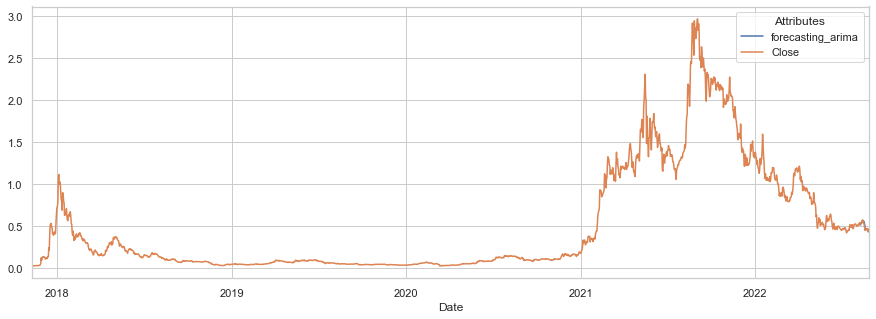

In [197]:
df[['forecasting_arima','Close']].plot(figsize=(15,5));

In [198]:
start = datetime.strptime('2022-08-28', '%Y-%m-%d')
date_list = [start+relativedelta(day=x) for x in range(0,365)]
future = pd.DataFrame(index=date_list,columns=df.columns)

In [200]:
future.sample(10)

Attributes Adj Close Close High  Low Open Volume forecasting_arima
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-03       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-06       NaN   NaN  NaN  NaN  NaN    NaN               NaN
2022-08-31       NaN   NaN  NaN  NaN  NaN    NaN               NaN

In [201]:
forecast_df = pd.concat([df,future], axis=0)

In [203]:
len(forecast_df)

2119

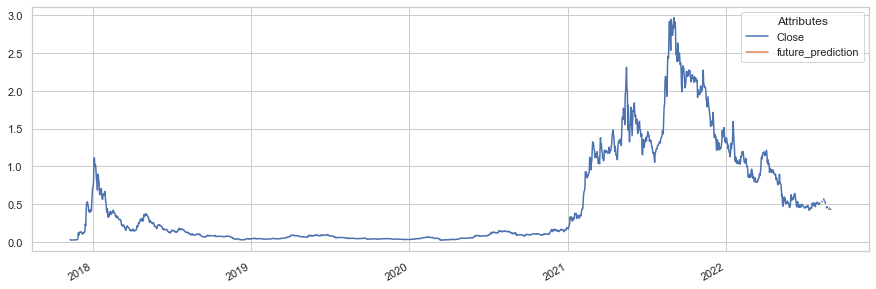

In [204]:
forecast_df['future_prediction'] = model_fit1.predict(start=1754,end=2119,dynamic=True)
forecast_df[['Close','future_prediction']].plot(figsize=(15,5))
plt.grid(True)

In [214]:
forecast_df.tail(300)

Attributes  Adj Close  Close  High  Low  Open Volume  forecasting_arima  \
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
...               ...    ...   ...  ...   ...    ...                ...   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   
2022-08-31        NaN    NaN   NaN  NaN   NaN    NaN                NaN   

Attributes  future_prediction  
2022-08-31           0.434348  
2022-08-31           0.434348  
2022-08-31           0.434348  
2022-08-31           0.434348  
2022-08-31           0.434348  
...                       ...  
2022-08-31           0.434348  
2022-08-31           0.434348  
2022-08-31           0.434348  
2022-08-31           0.434348  
2022-08-31           0.434348  

[300 rows x 8 columns]

## Ploting a Crypto by Volume with MAE and Avg. Expanding

In [9]:
# the following makes 2 graphs that show the volume moved per day vs the price of the coin

In [10]:
fig = px.bar(df.Volume)
fig2 = px.scatter(df.Close)
fig.show()
fig2.show()

# Extracting the News for Crypto

NEWS API provides access to articles published from any given subject by the most established news sources in the world, we can use this API to find articles of any given subject and date.

## Import the required library

In [218]:
import pandas as pd
from newsapi import NewsApiClient
import dotenv
import os


## Loading our API key 

with the use of a ".env" file we avoid diclosing our credentials

In [219]:
dotenv.load_dotenv()

pass_w=os.getenv("news_api_key")
newsapi = NewsApiClient(api_key=pass_w)

## Extracting information from the NEWS API

for this process the developer API onl;y allows us to use a specific range of time.

we can follow the " News API" instruction to extract information at:

"https://newsapi.org/docs/client-libraries/python"


To begin we can identify the diferent filtering criterias from the API that we are going to use. in this case the API requires a source of news from where to extract the articles and the date and range.  

In [220]:
sources = newsapi.get_sources()

In [47]:
sources["sources"][1]

{'id': 'abc-news-au',
 'name': 'ABC News (AU)',
 'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
 'url': 'http://www.abc.net.au/news',
 'category': 'general',
 'language': 'en',
 'country': 'au'}

In [49]:
sourcelist=[]
for i in range(0,len(sources["sources"])):
    temp = sources["sources"][i]["id"]
    sourcelist.append(temp)
print(sourcelist)

['abc-news', 'abc-news-au', 'aftenposten', 'al-jazeera-english', 'ansa', 'argaam', 'ars-technica', 'ary-news', 'associated-press', 'australian-financial-review', 'axios', 'bbc-news', 'bbc-sport', 'bild', 'blasting-news-br', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'business-insider-uk', 'buzzfeed', 'cbc-news', 'cbs-news', 'cnn', 'cnn-es', 'crypto-coins-news', 'der-tagesspiegel', 'die-zeit', 'el-mundo', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'financial-post', 'focus', 'football-italia', 'fortune', 'four-four-two', 'fox-news', 'fox-sports', 'globo', 'google-news', 'google-news-ar', 'google-news-au', 'google-news-br', 'google-news-ca', 'google-news-fr', 'google-news-in', 'google-news-is', 'google-news-it', 'google-news-ru', 'google-news-sa', 'google-news-uk', 'goteborgs-posten', 'gruenderszene', 'hacker-news', 'handelsblatt', 'ign', 'il-sole-24-ore', 'independent', 'infobae', 'info-money', 'la-gaceta', 'la-nacion', 'la-repubblica', 'le-m

Using the sources option we can now check what articles are available from a specific source. 

In [225]:
list_sources = ['al-jazeera-english', 
                'bbc-news', 
                'business-insider', 
                'cnn', 
                'financial-post', 
                'fox-news', 
                'google-news', 
                'independent', 
                'info-money', 
                'the-wall-street-journal', 
                'the-washington-post', 
                'the-washington-times', 
                'time',]

In [ ]:
articles = []
for i in list_sources:
    source = i
    date = "2022-08-01"
    date2 = "2022-08-27"
    q = "NFT"

    all_articles = newsapi.get_everything(q=q,
                                          sources=source,
                                          from_param=date,
                                          to=date2,
                                          language='en',
                                          sort_by='relevancy',
                                          page=1)
    articles.append(all_articles)

In [ ]:
articles

In [80]:
source = "time"
date = "2022-07-30"
date2 = "2022-08-27"
q = "bitcoin"

all_articles = newsapi.get_everything(q=q,
                                      sources=source,
                                      from_param=date,
                                      to=date2,
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

In [83]:
all_articles["articles"][0]

{'source': {'id': 'time', 'name': 'Time'},
 'author': 'Andrew R. Chow',
 'title': 'A New U.S. Crackdown Has Crypto Users Worried About Their Privacy',
 'description': "The U.S. Treasury's decision to crack down on the crypto service was met with a huge backlash, and could lead to litigation.",
 'url': 'https://time.com/6205143/tornado-cash-us-crypto-ban/',
 'urlToImage': 'https://api.time.com/wp-content/uploads/2022/08/GettyImages-1306710030.jpg?quality=85&w=1200&h=628&crop=1',
 'publishedAt': '2022-08-10T19:47:00Z',
 'content': 'The battle between the crypto community and the U.S. government over financial privacy just escalated dramatically, amid government efforts to crack down on criminals. \r\nTornado Cash is a service tha… [+10203 chars]'}

In [84]:
pd.DataFrame(all_articles["articles"])

source  \
0  {'id': 'time', 'name': 'Time'}   
1  {'id': 'time', 'name': 'Time'}   
2  {'id': 'time', 'name': 'Time'}   

                                              author  \
0                                     Andrew R. Chow   
1  Billy Perrigo/Washington, Andrew R. Chow and V...   
2                                     Andrew R. Chow   

                                               title  \
0  A New U.S. Crackdown Has Crypto Users Worried ...   
1   The Twitter Whistleblower Needs You to Trust Him   
2  Twitter Whistleblower Alleges Deception: Alleg...   

                                         description  \
0  The U.S. Treasury's decision to crack down on ...   
1  An exclusive interview with Twitter whistleblo...   
2  Twitter's former head of security, Peiter “Mud...   

                                                 url  \
0  https://time.com/6205143/tornado-cash-us-crypt...   
1  https://time.com/6208696/twitter-whistleblower...   
2  https://time.com/6207996/twitter-whistleblower...   

                                          urlToImage           publishedAt  \
0  https://api.time.com/wp-content/uploads/2022/0...  2022-08-10T19:47:00Z   
1  https://api.time.com/wp-content/uploads/2022/0...  2022-08-25T21:38:09Z   
2  https://api.time.com/wp-content/uploads/2022/0...  2022-08-23T11:13:18Z   

                                             content  
0  The battle between the crypto community and th...  
1  Peiter Zatko, the Twitter whistle-blower, is a...  
2  Twitter’s former top security official has all...

## Filtering on what to Extract:

from the 1st call we check on 1 of the articles we got to see the information that we extract.

the columns with usefull informarion are the following ones.
 - author
 - title
 - description
 - publishedAt <- the date can be of uste to locate it in the time series and mark it. 
 - URL <- Url for the article
 - urltoimage <- Image that we can display for the article
 - content < - might not need since the text is so long and we can go to the web page.
 - source <- this identifies who the publisher was
 
 note: since there is so many sources, ill select a top 3 of the most trustworthy sources and get the 3 most relevant articles form every stablishment to display in the last week. 